## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [ ]:
# Choosing Dataset
ratings_df = pd.read_csv('https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/ratings_small.csv')
movies_df = pd.read_csv('https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/movies_metadata.csv',encoding='maccentraleurope', on_bad_lines='skip')

In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,30/10/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,15/12/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,22/12/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,22/12/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,10/02/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30050 entries, 0 to 30049
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  30050 non-null  object 
 1   belongs_to_collection  3355 non-null   object 
 2   budget                 30050 non-null  object 
 3   genres                 30050 non-null  object 
 4   homepage               4873 non-null   object 
 5   id                     30050 non-null  object 
 6   imdb_id                30038 non-null  object 
 7   original_language      30047 non-null  object 
 8   original_title         30050 non-null  object 
 9   overview               29721 non-null  object 
 10  popularity             30046 non-null  float64
 11  poster_path            29887 non-null  object 
 12  production_companies   30048 non-null  object 
 13  production_countries   30048 non-null  object 
 14  release_date           30019 non-null  object 
 15  re

## Preprocessing and EDA

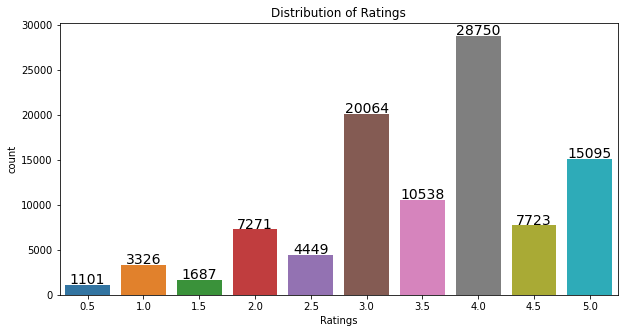

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=ratings_df, x='rating')
labels = (ratings_df['rating'].value_counts().sort_index())
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')

for i,v in enumerate(labels):
    ax.text(i, v+100, str(v), horizontalalignment='center', size=14, color='black')
plt.show()

In [ ]:
title_mask = movies_df['title'].isna()

In [ ]:
movies_df = movies_df.loc[title_mask == False]

In [ ]:
movies_df = movies_df.astype({'id': 'int64'})

In [ ]:
df = pd.merge(ratings_df, movies_df[['id', 'title']], left_on='movieId', right_on='id')
df.head()

,userId,movieId,rating,timestamp,id,title
0,1,1371,2.5,1260759135,1371,Rocky III
1,4,1371,4.0,949810302,1371,Rocky III
2,7,1371,3.0,851869160,1371,Rocky III
3,19,1371,4.0,855193404,1371,Rocky III
4,21,1371,3.0,853852263,1371,Rocky III


Id column is repeated and the timestamp is not important for this problem. So, you can drop the two.

In [ ]:
df.drop(['timestamp', 'id'], axis=1, inplace=True)

In [ ]:
df = df.drop_duplicates(['userId','title'])

The apriori model needs data in a format such that the userId forms the index, the columns are the movie titles and the values can be 1 or 0 depending on whether that user has watched the movie of the corresponding column. The resulting data is like a user's watchlist, for each userId, having 1 in columns of the movies that the user has watched and 0 otherwise.

You can achieve this by using pivot on the dataframe. To do so you need to first make sure there are no duplicate records for the combination of userId and title.

Convert the ratings to 0 or 1 and also convert all float values to int.

In [ ]:
df_pivot = df.pivot(index='userId', columns='title', values='rating').fillna(0)

In [ ]:
df_pivot = df_pivot.astype('int64')

In [ ]:
def encode_ratings(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

df_pivot = df_pivot.applymap(encode_ratings)

In [ ]:
df_pivot.head()

title,!Women Art Revolution,'Twas the Night Before Christmas,...And God Created Woman,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,13 Tzameti,1408,...,ZatŰichi's Pilgrimage,Zazie dans le mťtro,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,°Three Amigos!,ņ nos amours
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cols = [x for x in range(101,384)]
df_pivot = df_pivot.drop(df_pivot.columns[cols], axis =1)

## Training the Model using Built-in Library Function

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemset = apriori(df_pivot, min_support=0.1, use_colnames=True)

In [ ]:
frequent_itemset.head()

,support,itemsets
0,0.129657,"(20,000 Leagues Under the Sea)"
1,0.129657,(2001: A Space Odyssey)
2,0.298063,(48 Hrs.)
3,0.292101,(5 Card Stud)
4,0.150522,(A Clockwork Orange)


In [ ]:
len(frequent_itemset)

3588

The apriori algorithm gives the support, using association_rules we can compute the other paramters like confidence and lift.

In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemset, metric="lift", min_threshold=2)

In [ ]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A Clockwork Orange),(48 Hrs.),0.150522,0.298063,0.101341,0.673267,2.258812,0.056476,2.148354
1,(48 Hrs.),(A Clockwork Orange),0.298063,0.150522,0.101341,0.340000,2.258812,0.056476,1.287088
2,(Cockles and Muscles),(48 Hrs.),0.171386,0.298063,0.129657,0.756522,2.538130,0.078573,2.882957
3,(48 Hrs.),(Cockles and Muscles),0.298063,0.171386,0.129657,0.435000,2.538130,0.078573,1.466573
4,(Dave Chappelle's Block Party),(48 Hrs.),0.162444,0.298063,0.119225,0.733945,2.462385,0.070807,2.638316


## Metrics
Sort the result by descending order of lift. So that the most likely movie that the user will watch is recommended first.

In [ ]:
df_res = rules.sort_values(by=['lift'], ascending=False)
df_res.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
311,(Waiter),(Muxmšuschenstill),0.120715,0.154993,0.105812,0.876543,5.655389,0.087102,6.844560
310,(Muxmšuschenstill),(Waiter),0.154993,0.120715,0.105812,0.682692,5.655389,0.087102,2.771079
10619,"(Silent Hill, The Conversation)","(Lost in Translation, To Kill a Mockingbird)",0.189270,0.120715,0.105812,0.559055,4.631185,0.082964,1.994092
10614,"(Lost in Translation, To Kill a Mockingbird)","(Silent Hill, The Conversation)",0.120715,0.189270,0.105812,0.876543,4.631185,0.082964,6.566915
18781,"(Terminator 3: Rise of the Machines, Rain Man,...","(Reservoir Dogs, A Nightmare on Elm Street)",0.134128,0.165425,0.101341,0.755556,4.567367,0.079153,3.414172


In [ ]:
print("Number of rules generated:",len(df_res))

Number of rules generated: 21062


### Recommendation:

Let's see what the model recommends to someone who has watched the movie **Titanic**

In [ ]:
df_T = df_res[df_res['antecedents'].apply(lambda x: len(x) ==1 and next(iter(x)) == 'Titanic')]

In [ ]:
df_T = df_T[df_T['lift'] > 2]

In [ ]:
df_T.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4566,(Titanic),"(Reservoir Dogs, Romeo + Juliet)",0.271237,0.117735,0.105812,0.390110,3.313465,0.073878,1.446597
14289,(Titanic),"(Psycho, Solaris, Terminator 3: Rise of the Ma...",0.271237,0.116244,0.104322,0.384615,3.308679,0.072792,1.436103
11215,(Titanic),"(Monsoon Wedding, Psycho, Solaris)",0.271237,0.122206,0.108793,0.401099,3.282163,0.075646,1.465675
4153,(Titanic),"(Psycho, Solaris)",0.271237,0.134128,0.119225,0.439560,3.277167,0.082845,1.544987
11263,(Titanic),"(Monsoon Wedding, Psycho, The Hours)",0.271237,0.122206,0.105812,0.390110,3.192241,0.072666,1.439266


Let's have a list of unique movies in the order of descending lift.

In [ ]:
movies = df_T['consequents'].values

movie_list = []
for movie in movies:
    for title in movie:
        if title not in movie_list:
            movie_list.append(title)

In [ ]:
movie_list[0:10]

['Reservoir Dogs',
 'Romeo + Juliet',
 'Psycho',
 'Solaris',
 'Terminator 3: Rise of the Machines',
 'Monsoon Wedding',
 'The Hours',
 'Rain Man',
 'The Million Dollar Hotel',
 'A Nightmare on Elm Street']

# Association Mining using User Defined function

### Creating APRIORI_MY function to generate frequent itesets based on minimum threshold support = 0.02

In [ ]:
def APRIORI_MY(data, min_support=0.07,  max_length = 4):
    # Collecting Required Library
    import numpy as np
    import pandas as pd
    from itertools import combinations
    # Step 1:
    # Creating a dictionary to stored support of an itemset.
    support = {} 
    L = list(data.columns)
    
    # Step 2: 
    #generating combination of items with len i in ith iteration
    for i in range(1, max_length+1):
        c = set(combinations(L,i))
        
    # Reset "L" for next ith iteration
        L =set()     
    # Step 3: 
        #iterate through each item in "c"
        print(i,c)
        for j in list(c):
            # print(j)
            sup = data.loc[:,j].product(axis=1).sum()/len(data.index)
            if sup > min_support:
                #print(sup, j)
                support[j] = sup
                
                # Appending frequent itemset in list "L", already reset list "L" 
                L = list(set(L) | set(j))
        
    # Step 4: data frame with cols "items", 'support'
    result = pd.DataFrame(list(support.items()), columns = ["Items", "Support"])
    return(result)
    

In [ ]:
my_freq_itemset = APRIORI_MY(df_pivot, 0.1, 4)
my_freq_itemset.sort_values(by = 'Support', ascending = False)

1 {('I Woke Up Early The Day I Died',), ('Lethal Weapon',), ('Dear Brigitte',), ('Nashville',), ('Vice Squad',), ('Gang War in Milan',), ('88 Minutes',), ('The Sum of All Fears',), ('Secrets of a Soul',), ('Spaceballs',), ('Throne of Blood',), ('Wild Things',), ('La Jetťe',), ('The Wing or the Thigh',), ('Lions for Lambs',), ('Club Paradise',), ("Children of the Corn 666: Isaac's Return",), ('The Visit',), ('Confessions of a Dangerous Mind',), ('Torch Song Trilogy',), ('The Whole Nine Yards',), ('White of the Eye',), ('Sixtynine',), ('The Guardian',), ('Hook',), ("I Can't Sleep",), ('The Other Side of the Mountain: Part II',), ('Raising Arizona',), ('Flags of Our Fathers',), ('Harry Potter and the Goblet of Fire',), ('Hour of the Gun',), ('Cherry Blossoms',), ('Mirror',), ('Dog Day Afternoon',), ('The Badge',), ('The English Patient',), ('Clťo from 5 to 7',), ('Magnolia',), ('RoboCop',), ('The Matrix Revolutions',), ('The Masseurs and a Woman',), ('Gomorrah',), ('Looking for Lenny',), 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,Items,Support
90,"(Terminator 3: Rise of the Machines,)",0.481371
109,"(The Million Dollar Hotel,)",0.463487
65,"(Solaris,)",0.450075
8,"(The 39 Steps,)",0.432191
106,"(Monsoon Wedding,)",0.406855
...,...,...
2517,"(Romeo + Juliet, The Hours, Monsoon Wedding, T...",0.101341
1353,"(Grill Point, Terminator 3: Rise of the Machin...",0.101341
3060,"(Titanic, Romeo + Juliet, Monsoon Wedding, Sol...",0.101341
3059,"(A Nightmare on Elm Street, Wag the Dog, Monso...",0.101341


### Creating ASSOCIATION_RULE_MY function to generate itemset based on minimun threshold confidence

In [ ]:
def ASSOCIATION_RULE_MY(df, min_threshold=0.5):
    import pandas as pd
    from itertools import permutations
    
    # STEP 1:
    #creating required varaible
    support = pd.Series(df.Support.values, index=df.Items).to_dict()
    data = []
    L= df.Items.values
    
    # Step 2:
    #generating rule using permutation
    p = list(permutations(L, 2))
    
    # Iterating through each rule
    for i in p:
        
        # If LHS(Antecedent) of rule is subset of RHS then valid rule.
        if set(i[0]).issubset(i[1]):
            conf = support[i[1]]/support[i[0]]
            #print(i, conf)
            if conf > min_threshold:
                #print(i, conf)
                j = i[1][not i[1].index(i[0][0])]
                lift = support[i[1]]/(support[i[0]]* support[(j,)])
                leverage = support[i[1]] - (support[i[0]]* support[(j,)])
                convection = (1 - support[(j,)])/(1- conf)
                data.append([i[0], (j,), support[i[0]], support[(j,)], support[i[1]], conf, lift, leverage, convection])

         
    # STEP 3:
    result = pd.DataFrame(data, columns = ["antecedents", "consequents", "antecedent support", "consequent support",
                                        "support", "confidence", "Lift", "Leverage", "Convection"])
    return(result)

In [ ]:
## Rule with minimun confidence = 50%
my_rule = ASSOCIATION_RULE_MY(my_freq_itemset, 0.5)
my_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,Lift,Leverage,Convection
0,"(The Bourne Supremacy,)","(Terminator 3: Rise of the Machines,)",0.157973,0.481371,0.107303,0.679245,1.411064,0.031259,1.616902
1,"(The Bourne Supremacy,)","(5 Card Stud,)",0.157973,0.292101,0.101341,0.641509,2.196188,0.055197,1.974665
2,"(The Bourne Supremacy,)","(License to Wed,)",0.157973,0.298063,0.114754,0.726415,2.437123,0.067668,2.565702
3,"(The Bourne Supremacy,)","(The 39 Steps,)",0.157973,0.432191,0.110283,0.698113,1.615290,0.042009,1.880868
4,"(The Bourne Supremacy,)","(The Million Dollar Hotel,)",0.157973,0.463487,0.110283,0.698113,1.506219,0.037065,1.777198
...,...,...,...,...,...,...,...,...,...
14350,"(To Kill a Mockingbird, A Nightmare on Elm Str...","(A Nightmare on Elm Street,)",0.125186,0.266766,0.105812,0.845238,3.168462,0.072417,4.737820
14351,"(To Kill a Mockingbird, A Nightmare on Elm Str...","(A Nightmare on Elm Street,)",0.125186,0.266766,0.107303,0.857143,3.213089,0.073907,5.132638
14352,"(To Kill a Mockingbird, A Nightmare on Elm Str...","(A Nightmare on Elm Street,)",0.125186,0.266766,0.110283,0.880952,3.302341,0.076888,6.159165
14353,"(The Million Dollar Hotel, Reservoir Dogs, The...","(Reservoir Dogs,)",0.116244,0.228018,0.104322,0.897436,3.935814,0.077816,7.526826


### Metrics

In [ ]:
print("Number of rules generated:",len(my_rule))

Number of rules generated: 14355


Sorting results by Lift to get highly associated itemsets

In [ ]:
df_my_rules = my_rule.sort_values(by='Lift', ascending= False).head(10)

In [ ]:
df_my_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,Lift,Leverage,Convection
3424,"(Terminator 3: Rise of the Machines, The Scien...","(The Science of Sleep,)",0.117735,0.134128,0.101341,0.860759,6.417440,0.085550,6.218534
4579,"(The Million Dollar Hotel, High Noon)","(High Noon,)",0.116244,0.159463,0.110283,0.948718,5.949437,0.091746,16.390462
6724,"(Rain Man, A Clockwork Orange)","(A Clockwork Orange,)",0.114754,0.150522,0.101341,0.883117,5.867044,0.084068,7.267760
4992,"(Terminator 3: Rise of the Machines, A Clockwo...","(A Clockwork Orange,)",0.117735,0.150522,0.102832,0.873418,5.802607,0.085110,6.710879
8608,"(The Million Dollar Hotel, Rebecca)","(Rebecca,)",0.110283,0.160954,0.101341,0.918919,5.709209,0.083591,10.348236


### Recommendation:

In [ ]:
df_T = my_rule[my_rule['antecedents'].apply(lambda x: len(x) ==1 and next(iter(x)) == 'Titanic')]

In [ ]:
df_T = df_T[df_T['Lift'] > 2]

In [ ]:
df_T.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,Lift,Leverage,Convection
368,"(Titanic,)","(Rain Man,)",0.271237,0.293592,0.168405,0.620879,2.114771,0.088772,1.863280
369,"(Titanic,)","(The Hours,)",0.271237,0.301043,0.168405,0.620879,2.062425,0.086751,1.843625
371,"(Titanic,)","(Reservoir Dogs,)",0.271237,0.228018,0.160954,0.593407,2.602456,0.099107,1.898659
375,"(Titanic,)","(Psycho,)",0.271237,0.186289,0.150522,0.554945,2.978945,0.099993,1.828338
377,"(Titanic,)","(A Nightmare on Elm Street,)",0.271237,0.266766,0.166915,0.615385,2.306833,0.094558,1.906408


In [ ]:
movies = df_T['consequents'].values

movie_list = []
for movie in movies:
    for title in movie:
        if title not in movie_list:
            movie_list.append(title)

In [ ]:
movie_list[0:10]

['Rain Man',
 'The Hours',
 'Reservoir Dogs',
 'Psycho',
 'A Nightmare on Elm Street',
 'Wag the Dog']